# Eleições 2020
## Analise de dados dos candidatos a prefeito e vereador

Este é um trabalho de análise de dados das eleições municipais de 2020, feito por aluno(s) da faculdade de Tecnologia de São José dos Campos, Fatec Jessem Vidal, do curso de Análise e Desenvolvimento de Sistemas para a disciplina de Estrutura de Dados do Profº Fernando Masanori.
A fonte dos dados pode ser acessada em http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1
O conteúdo desde notebook serve apenas para aprendizado e não deve ser utilizado para fins de propaganda politico-partidaria de qualquer natureza. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## importando os dados
file = r'consulta_cand_2020_SP.csv'
lst = ['DS_ELEICAO', 'SG_UF', 'NM_UE', 'DS_CARGO', 'DS_SITUACAO_CANDIDATURA', 'DS_DETALHE_SITUACAO_CAND', 
       'SG_PARTIDO', 'SG_UF_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO',
       'DS_COR_RACA', 'DS_OCUPACAO']
df = pd.read_csv(file, delimiter=';',usecols= lst, encoding='Latin 1')
df.shape

(93692, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93692 entries, 0 to 93691
Data columns (total 13 columns):
DS_ELEICAO                  93692 non-null object
SG_UF                       93692 non-null object
NM_UE                       93692 non-null object
DS_CARGO                    93692 non-null object
DS_SITUACAO_CANDIDATURA     93692 non-null object
DS_DETALHE_SITUACAO_CAND    93692 non-null object
SG_PARTIDO                  93692 non-null object
SG_UF_NASCIMENTO            93692 non-null object
NM_MUNICIPIO_NASCIMENTO     93692 non-null object
DS_GENERO                   93692 non-null object
DS_GRAU_INSTRUCAO           93692 non-null object
DS_COR_RACA                 93692 non-null object
DS_OCUPACAO                 93692 non-null object
dtypes: object(13)
memory usage: 9.3+ MB


In [4]:
df.sample(5)

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
9207,Eleições Municipais 2020,SP,GUAÍRA,VEREADOR,APTO,DEFERIDO,PSB,SP,PENÁPOLIS,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,BRANCA,COMERCIANTE
82974,Eleições Municipais 2020,SP,MURUTINGA DO SUL,VEREADOR,CADASTRADO,AGUARDANDO JULGAMENTO,PODE,SP,MURUTINGA DO SUL,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,SERVIDOR PÚBLICO MUNICIPAL
299,Eleições Municipais 2020,SP,ALTINÓPOLIS,VEREADOR,APTO,DEFERIDO,DEM,SP,ALTINÓPOLIS,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,OUTROS
61765,Eleições Municipais 2020,SP,PRESIDENTE PRUDENTE,VEREADOR,APTO,INDEFERIDO COM RECURSO,AVANTE,SP,PENÁPOLIS,FEMININO,SUPERIOR COMPLETO,BRANCA,OUTROS
16545,Eleições Municipais 2020,SP,JACAREÍ,VEREADOR,APTO,DEFERIDO,PC do B,MG,ITAJUBÁ,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,BRANCA,APOSENTADO (EXCETO SERVIDOR PÚBLICO)


Primeiro farei uma analise apenas dos candidatos do municipio de São José dos Campos.
O arquivo original tem 63 colunas, portanto usarei apenas aquelas que considerar relevantes

In [5]:
df_sjc = df.query('NM_UE == "SÃO JOSÉ DOS CAMPOS"')
df_sjc.shape

(621, 13)

In [6]:
df_sjc.describe()

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
count,621,621,621,621,621,621,621,621,621,621,621,621,621
unique,1,1,1,3,2,5,24,20,210,2,7,5,97
top,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,PSD,SP,SÃO JOSÉ DOS CAMPOS,MASCULINO,SUPERIOR COMPLETO,BRANCA,OUTROS
freq,621,621,621,599,606,582,34,437,262,418,240,451,100


O partido com mais candidatos é o PT, na maioria os candidatos são homens, muitos tem curso superior completo e são brancos

In [7]:
df_sjc.sample(5)

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
47740,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,SOLIDARIEDADE,SP,TUPÃ,FEMININO,ENSINO MÉDIO COMPLETO,BRANCA,MOTORISTA PARTICULAR
76747,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,PRTB,PR,SANTA ISABEL DO IVAÍ,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,OUTROS
36597,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,PODE,SP,SÃO JOSÉ DOS CAMPOS,MASCULINO,SUPERIOR COMPLETO,BRANCA,ENGENHEIRO
30226,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,SOLIDARIEDADE,SP,SÃO JOSÉ DOS CAMPOS,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,PROFESSOR E INSTRUTOR DE FORMAÇÃO PROFISSIONAL
11216,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,AVANTE,ES,ANCHIETA,FEMININO,ENSINO FUNDAMENTAL COMPLETO,BRANCA,DONA DE CASA


In [8]:
df_sjc.query('DS_CARGO == "PREFEITO"')

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
593,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSL,SP,APARECIDA,MASCULINO,SUPERIOR COMPLETO,BRANCA,ADMINISTRADOR
22681,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PL,SP,SÃO PAULO,FEMININO,SUPERIOR COMPLETO,BRANCA,POLICIAL MILITAR
28479,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSB,SP,SÃO PAULO,MASCULINO,SUPERIOR COMPLETO,BRANCA,MÉDICO
32239,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PC do B,SP,CRUZEIRO,MASCULINO,SUPERIOR COMPLETO,PRETA,APOSENTADO (EXCETO SERVIDOR PÚBLICO)
33548,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PTC,SP,SERTÃOZINHO,MASCULINO,SUPERIOR COMPLETO,BRANCA,ADMINISTRADOR
45254,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSOL,SP,SÃO PAULO,FEMININO,ENSINO MÉDIO COMPLETO,BRANCA,ELETRICISTA E ASSEMELHADOS
52462,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,NOVO,RO,PORTO VELHO,MASCULINO,SUPERIOR COMPLETO,PARDA,PROFESSOR DE ENSINO SUPERIOR
61593,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSD,SP,TAUBATÉ,FEMININO,SUPERIOR COMPLETO,BRANCA,ADVOGADO
70808,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSDB,SP,SÃO PAULO,MASCULINO,SUPERIOR COMPLETO,BRANCA,PREFEITO
85011,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PT,SP,SÃO JOSÉ DOS CAMPOS,MASCULINO,SUPERIOR COMPLETO,BRANCA,VEREADOR


In [9]:
df_sjc['DS_CARGO'].value_counts()

VEREADOR         599
PREFEITO          11
VICE-PREFEITO     11
Name: DS_CARGO, dtype: int64

In [10]:
df_sjc.isnull().sum()

DS_ELEICAO                  0
SG_UF                       0
NM_UE                       0
DS_CARGO                    0
DS_SITUACAO_CANDIDATURA     0
DS_DETALHE_SITUACAO_CAND    0
SG_PARTIDO                  0
SG_UF_NASCIMENTO            0
NM_MUNICIPIO_NASCIMENTO     0
DS_GENERO                   0
DS_GRAU_INSTRUCAO           0
DS_COR_RACA                 0
DS_OCUPACAO                 0
dtype: int64

## Proporção de generos em geral

In [11]:
df_sjc['DS_GENERO'].value_counts()

MASCULINO    418
FEMININO     203
Name: DS_GENERO, dtype: int64

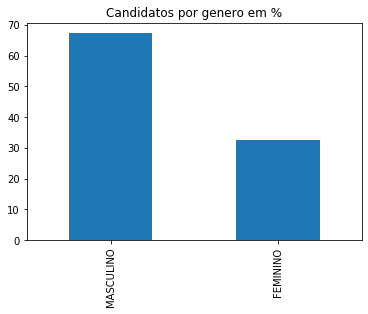

In [12]:
(df_sjc['DS_GENERO'].value_counts('DS_GENERO')*100).plot.bar(title='Candidatos por genero em %')

## Grau de escolaridade

In [13]:
df_sjc['DS_GRAU_INSTRUCAO'].value_counts()

SUPERIOR COMPLETO                240
ENSINO MÉDIO COMPLETO            227
ENSINO FUNDAMENTAL COMPLETO       48
SUPERIOR INCOMPLETO               45
ENSINO FUNDAMENTAL INCOMPLETO     31
ENSINO MÉDIO INCOMPLETO           20
LÊ E ESCREVE                      10
Name: DS_GRAU_INSTRUCAO, dtype: int64

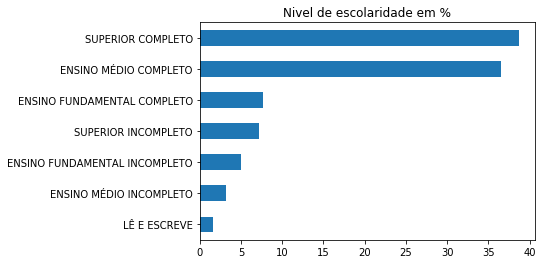

In [14]:
(df_sjc['DS_GRAU_INSTRUCAO'].value_counts('DS_GRAU_INSTRUCAO', 
                                          ascending=True) * 100).plot.barh(title='Nivel de escolaridade em %')

In [15]:
df_sjc['DS_SITUACAO_CANDIDATURA'].value_counts()

APTO      606
INAPTO     15
Name: DS_SITUACAO_CANDIDATURA, dtype: int64

In [16]:
df_sjc['DS_DETALHE_SITUACAO_CAND'].value_counts()

DEFERIDO                  582
INDEFERIDO COM RECURSO     22
INDEFERIDO                  9
RENÚNCIA                    6
DEFERIDO COM RECURSO        2
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

## Por cor

In [26]:
df_sjc['DS_COR_RACA'].value_counts()

BRANCA      451
PARDA        97
PRETA        67
AMARELA       5
INDÍGENA      1
Name: DS_COR_RACA, dtype: int64

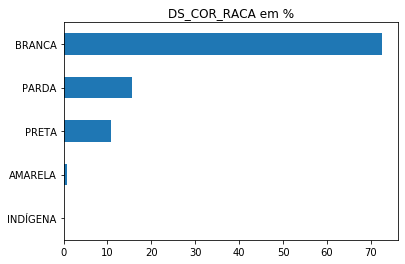

In [27]:
(df_sjc['DS_COR_RACA'].value_counts('DS_COR_RACA', 
                                          ascending=True) * 100).plot.barh(title='DS_COR_RACA em %')